In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from IPython.display import display, HTML
import plotly.express as px
pd.options.mode.chained_assignment = 'warn'  # default=
pd.options.plotting.backend = "plotly"
PATH_CACHE = Path("../../data/algos_results.csv").resolve()
print(PATH_CACHE)

C:\Users\robin\Documents\Cours\Poly\Recherche\MaitriseClustering\data\algos_results.csv


In [2]:
df = pd.read_csv(PATH_CACHE)

In [3]:
df100 = df[df["init_type"] == "random"].copy()
print(df100.columns)
print(df100["num_clusters"].unique())
Lcluster_concat = []
for num_clusters in [4,8,16,64]:
    Linit_concat = []
    for ImprClass, iteration_order in list(zip(["CallbackBestImprovement", "CallbackFirstImprovement","CallbackFirstImprovement","CallbackFirstImprovement"], ["BACK","CURR", "BACK", "RANDOM"])):
        tmp_df = df100[df100["ImprClass"] == ImprClass]
        tmp_df = tmp_df[tmp_df["iteration_order"] == iteration_order].sort_values(by=["uuid_points_coords","uuid_points_assign"],axis=0)
        tmp_df = tmp_df[tmp_df["num_clusters"] == num_clusters]
        tmp_df = tmp_df.drop(["init_cost","ImprClass","init_type","iteration_order","num_clusters","uuid_points_coords","uuid_points_assign"],axis=1)
        tmp_df.reset_index(drop=True, inplace=True)
        if ImprClass == "CallbackBestImprovement":
            backup_tmp_df = tmp_df.copy()
        else:
            tmp_df["cost_augm"] = tmp_df["end_cost"].reset_index(drop=True) - backup_tmp_df["end_cost"].reset_index(drop=True)
            # tmp_df = tmp_df.rename(columns={"end_cost":"cost_augm_BI"})
        tmp_df = tmp_df.groupby("num_points",as_index=False).mean()
        tmp_df = tmp_df.set_index(['num_points'])
        Linit_concat.append(tmp_df)
    Lcluster_concat.append(pd.concat(Linit_concat,axis=1, keys=["BI_BACK", "FI_CURR", "FI_BACK", "FI_RANDOM"]))

Index(['num_clusters', 'num_points', 'init_type', 'ImprClass',
       'iteration_order', 'init_cost', 'end_cost', 'num_iter', 'time',
       'uuid_points_coords', 'uuid_points_assign'],
      dtype='object')
[16  2  4  8 32 64]


In [4]:
pd.set_option('display.max_rows', None, 'display.max_columns', None)
df100_cluster = pd.concat(Lcluster_concat, axis=1, keys=["4 clusters", "8 clusters","16 clusters", "64 clusters"])
df100_cluster

4 clusters                                                      \
                 BI_BACK                          FI_CURR                      
                end_cost num_iter      time      end_cost num_iter      time   
num_points                                                                     
20           5705.342804   12.254  0.112840   5746.151804   25.051  0.107885   
30           9197.812228   21.410  0.309436   9167.008379   42.339  0.296689   
40          14506.005846   30.270  0.557933  14348.786391   60.690  0.565315   
50          18752.541618   37.685  0.808036  18505.084732   78.297  0.826179   
60          22290.983223   46.553  1.211266  22188.560625   98.873  1.248399   
70          28516.037258   55.570  1.659223  28334.192194  116.434  1.665104   
80          31897.472845   65.016  2.303660  31687.925332  136.424  2.320278   
90          37150.486936   75.171  2.980331  37111.662679  172.859  3.339091   
100                  NaN      NaN       NaN           NaN      NaN       NaN   

                                                                     \
                             FI_BACK                                  
             cost_augm      end_cost num_iter      time   cost_augm   
num_points                                                            
20           40.809000   5751.547336   25.088  0.092144   46.204532   
30          -30.803849   9167.008257   42.160  0.251640  -30.803971   
40         -157.219455  14346.044465   60.444  0.478951 -159.961381   
50         -247.456886  18505.746290   78.617  0.700293 -246.795328   
60         -102.422598  22186.583066   98.064  1.048460 -104.400157   
70         -181.845064  28333.976417  116.416  1.413984 -182.060841   
80         -209.547513  31688.360083  136.177  1.965819 -209.112762   
90          -38.824257  37111.662728  172.213  2.826806  -38.824208   
100                NaN           NaN      NaN       NaN         NaN   

                                                           8 clusters  \
               FI_RANDOM                                      BI_BACK   
                end_cost num_iter      time   cost_augm      end_cost   
num_points                                                              
20           5748.241293   25.218  0.096410   42.898489   1836.580722   
30           9173.137468   42.472  0.264844  -24.674760   4025.843851   
40          14348.786313   60.795  0.499262 -157.219533   6211.363831   
50          18519.472613   78.683  0.733761 -233.069005   8602.361103   
60          22191.796011   98.537  1.101176  -99.187212  10682.589992   
70          28343.034111  117.224  1.486276 -173.003147  12407.574668   
80          31688.111102  137.240  2.057737 -209.361743  14455.087322   
90          37111.662059  172.571  2.952307  -38.824877  16933.298093   
100                  NaN      NaN       NaN         NaN           NaN   

                                                                             \
                                    FI_CURR                                   
           num_iter      time      end_cost num_iter       time   cost_augm   
num_points                                                                    
20           12.859  0.274717   1868.732761   35.903   0.296002   32.152039   
30           22.835  0.735441   4047.063981   76.722   0.983858   21.220131   
40           32.285  1.364178   6173.340889  120.585   2.004035  -38.022942   
50           41.637  2.011114   8341.394304  170.225   3.316299 -260.966798   
60           52.930  3.045649  10294.543136  220.409   5.145425 -388.046856   
70           65.407  4.734163  12226.203265  280.264   8.392811 -181.371403   
80           76.309  6.115269  14194.762316  328.714  10.879960 -260.325007   
90           86.721  7.925592  16521.336981  384.729  14.448809 -411.961112   
100             NaN       NaN           NaN      NaN        NaN         NaN   

                                                                       

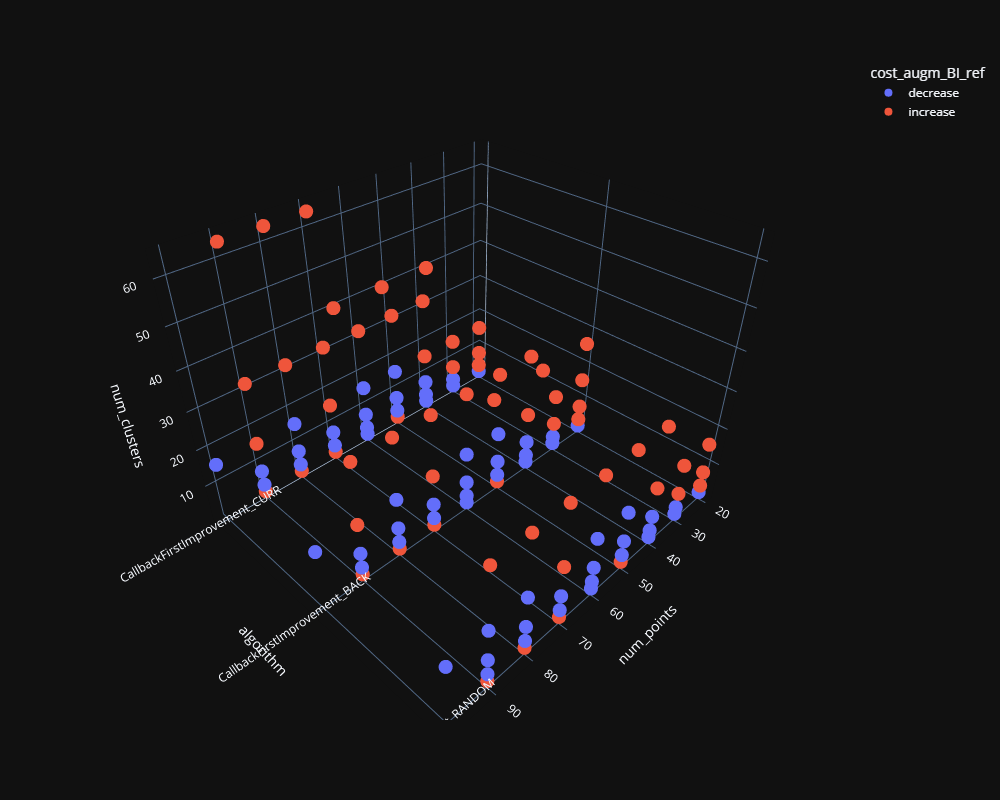

In [5]:

tmp_df = df[df["init_type"] == "random"].copy()
tmp_df.loc[:,"algorithm"] = tmp_df["ImprClass"]+"_" + tmp_df["iteration_order"]
tmp_df.loc[:,"index"] = tmp_df["uuid_points_coords"]+"_" + tmp_df["uuid_points_assign"]+"_"+tmp_df["num_points"].astype(str)
tmp_df = tmp_df.drop(["init_cost","ImprClass","init_type","iteration_order","uuid_points_coords","uuid_points_assign"],axis=1)
Lnew = []
for num_clust in [2,4,8,16,32,64,128]:
    df_tmp = tmp_df[tmp_df["num_clusters"] == num_clust].copy()
    Ldf = []
    for algorithm in pd.unique(df_tmp["algorithm"]):
        df_tmp1 = df_tmp[df_tmp["algorithm"] == algorithm].copy()
        df_tmp1.set_index(["index"],inplace=True)
        if "Best" in algorithm:
            backup_tmp_df = df_tmp1.copy()
            backup_tmp_df.loc[:,"algorithm"] = algorithm
            backup_tmp_df.loc[:,"num_clusters"] = num_clust
            continue
        else:
            current = df_tmp1
            df_tmp1 = df_tmp1.assign(cost_augm_BI_ref=current["end_cost"].copy() - backup_tmp_df["end_cost"].copy())
        df_tmp1 = df_tmp1.groupby("num_points",as_index=False).mean()
        df_tmp1.loc[:,"algorithm"] = algorithm
        df_tmp1.loc[:,"num_clusters"] = num_clust
        new_df_tmp1 = df_tmp1.copy()
        new_df_tmp1.loc[df_tmp1["cost_augm_BI_ref"]<0,"cost_augm_BI_ref"] = "decrease"
        new_df_tmp1.loc[df_tmp1["cost_augm_BI_ref"]>0,"cost_augm_BI_ref"] = "increase"
        new_df_tmp1.loc[df_tmp1["cost_augm_BI_ref"]==0,"cost_augm_BI_ref"] = "no_change"
        Ldf.append(new_df_tmp1)
    if len(Ldf) >0:
        Lnew.append(pd.concat(Ldf,axis=0))
new_df = pd.concat(Lnew,axis=0)
fig = px.scatter_3d(new_df, x='num_points', y='algorithm', z='num_clusters',
              color='cost_augm_BI_ref',color_continuous_scale  =["red","green","blue"],template="plotly_dark",width=1000,height=800)
fig.show("png")